In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Import the data

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Now we preprocess the data

In [4]:
raw_data.describe(include = 'all') 
"""By default only numerical variables are included in the description. To include categorical variables, we 
pass the include argument and set the value to all"""


'By default only numerical variables are included in the description. To include categorical variables, we \npass the include argument and set the value to all'

#### We select the variables we need for our regression

#### Since we have 312 unique values under model, this implies that we have 312 dummy variables, so we drop the 'Model' column

In [5]:
data = raw_data.drop(['Model'], axis =1) # We take out model 
data.describe(include = 'all') 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
"""Having discovered the missing values in the dataset, since the sum of these obervations are less than 5% of 
the total observations, we eliminate all obervations with null values"""
data_no_mv = data.dropna(axis = 0)

In [8]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### From the description above, we notice that the max price, mileage and engive volume value is susbstantially larger than the prices within the 25th, 50th and 75th percentile. This is due to outliers 

### Exploring the PDFs of the variables

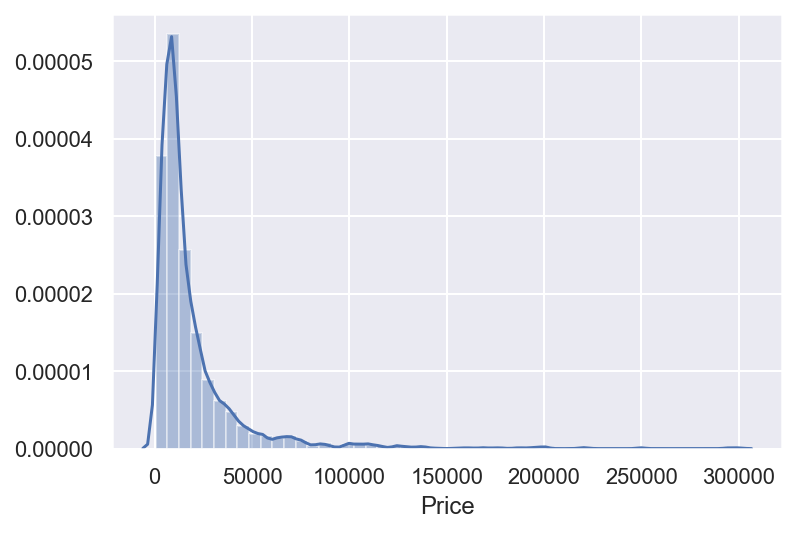

In [9]:
sns.distplot(data_no_mv['Price'])

#### To eliminate the outliers,we take out the top 1% of obervations for Price, Mileage and Engine Volume

In [10]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


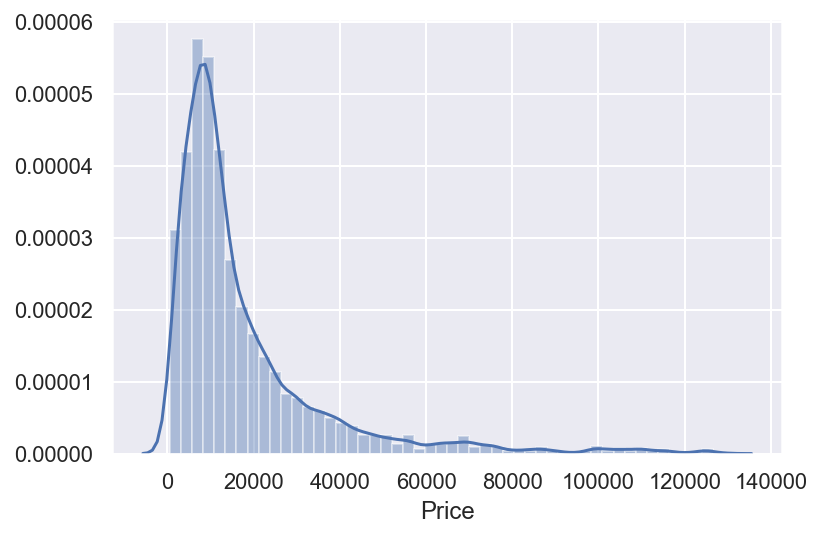

In [11]:
sns.distplot(data_1['Price'])

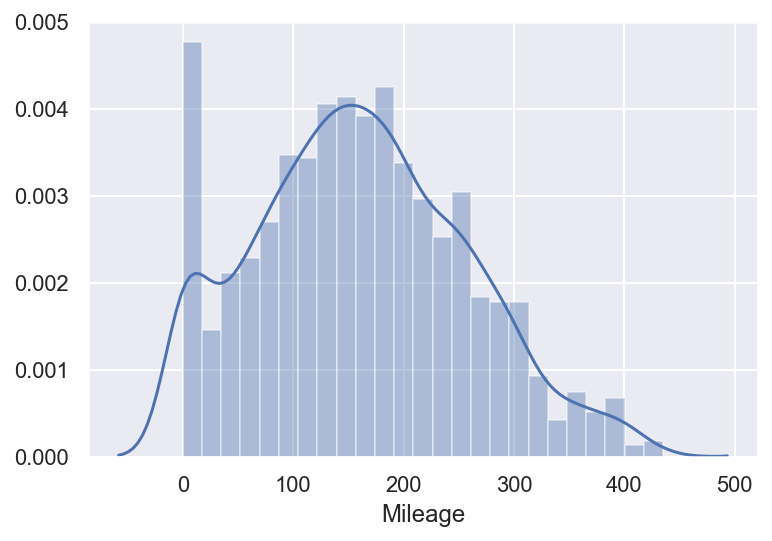

In [12]:
p = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < p]
sns.distplot(data_2['Mileage'])

#### We also notice that for the engine volume, we have some values up to 99.0 which shouldn't be so as we have learned from our research that engne volume should be between 0.6 and 6.5 but as it appears in the data, some missing values have been assigned 99.9

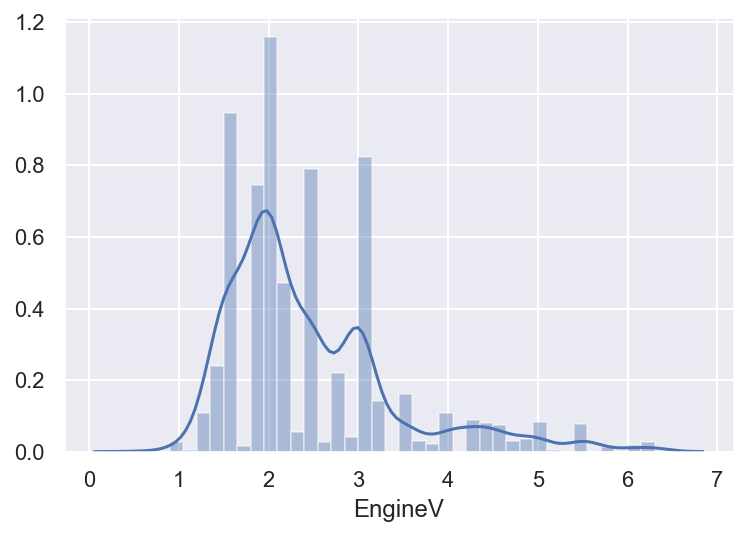

In [13]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

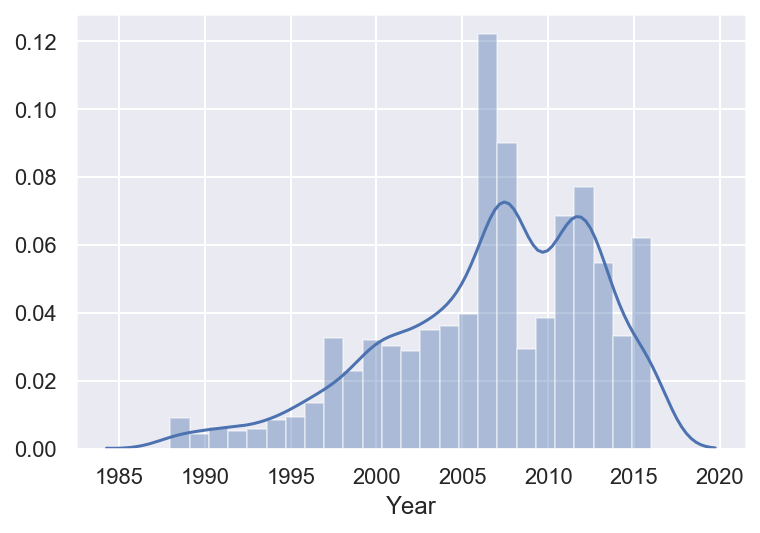

In [14]:
r = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > r]
sns.distplot(data_4['Year'])

In [15]:
"""In order to let our indexes represent the filtered/cleaned data, we reset the indexes and drop the indexes of the 
raw data"""
data_cleaned = data_4.reset_index(drop = True) 
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

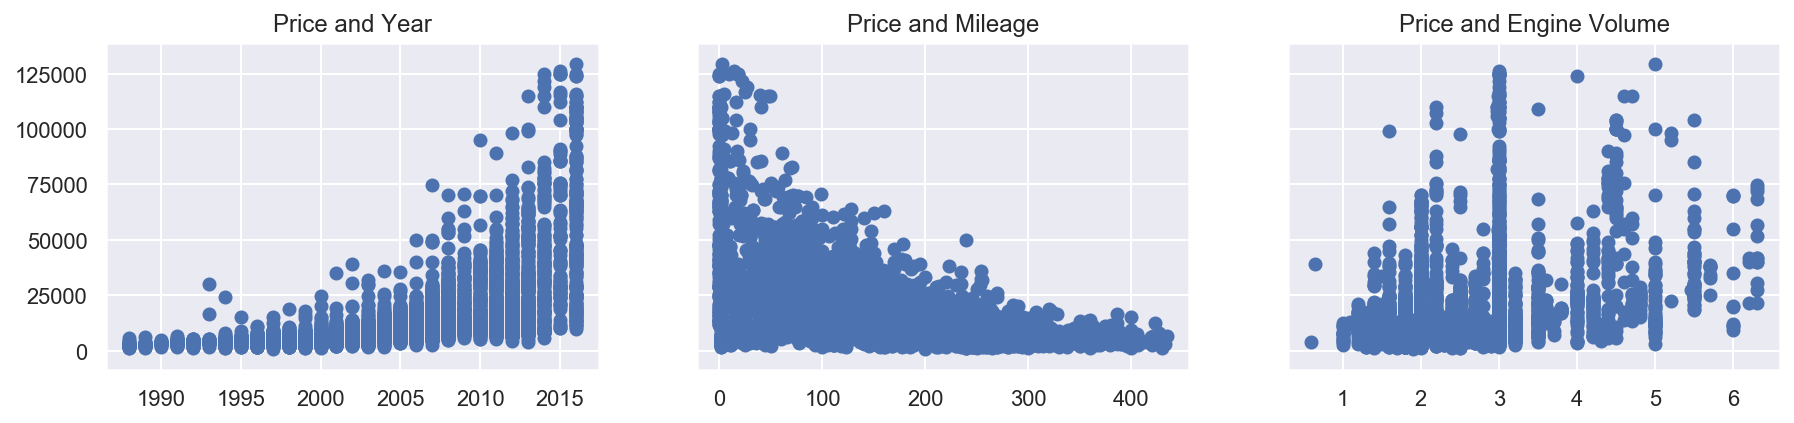

In [16]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")

ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title("Price and Mileage")

ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title("Price and Engine Volume")

plt.show()

#### Based on the graph above, we notice that the graph is not distributed symmetrically along the 45-degree line, which shows that the model is not linear in parameters. Hence, we will need to do a log transformation on the Price(dependent) variable as the PDF is exponentially distributed

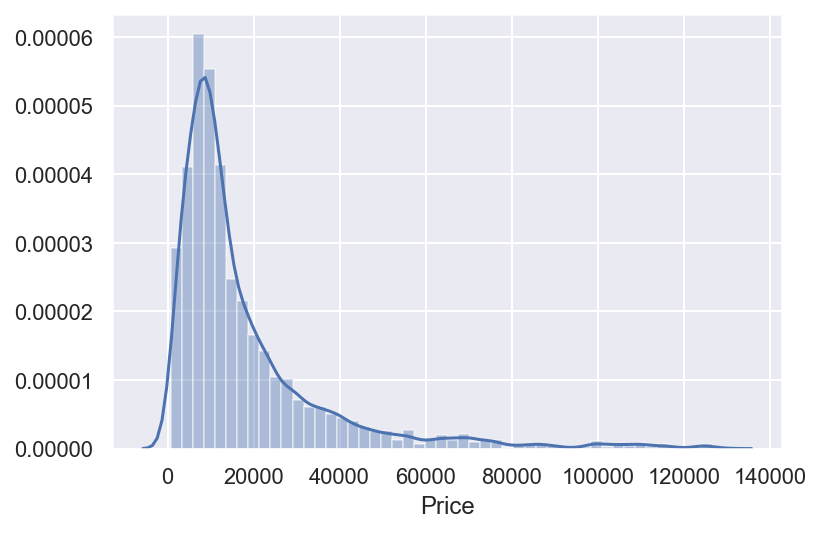

In [17]:
sns.distplot(data_cleaned['Price'])

In [18]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

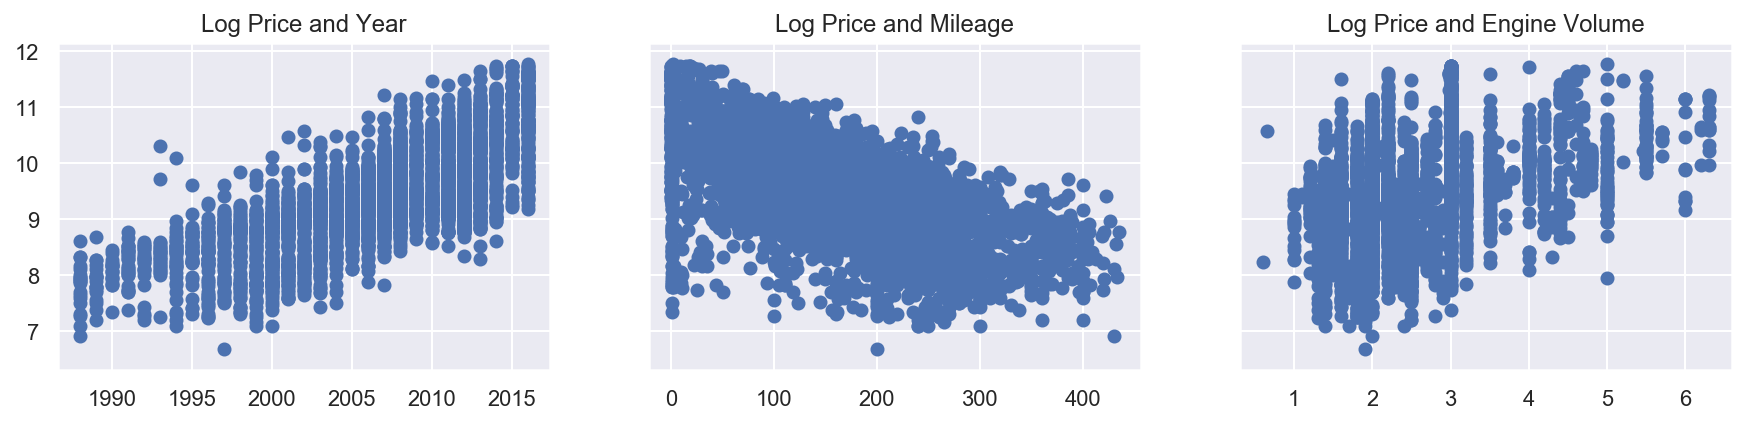

In [19]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("Log Price and Year")

ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title("Log Price and Mileage")

ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title("Log Price and Engine Volume")

plt.show()

In [20]:
data_cleaned = data_cleaned.drop(['Price'],axis =1)
data_cleaned.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


#### Following the CLT, we expect that large data sets are normally distributed such as this one. Also since we have done a log transformation, there is no homoscedasticity. The relationship is linear as shown in the graph above. There is also no endogeneity and autocorrelation

#### Multicollinearity

##### To check for multicollinearity, we use the vif(variance inflation factor)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [22]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


#### We see that the VIF of the predictor variable 'year' has a high multicollinearity which implies that it is highly correlated with one of the other predictor variables. So we can either drop this variable or transform the correlated variable into one. Here we drop the variable

In [23]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

In [24]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Creating dummies

In [25]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)#The drop_first = True ensures 
#that no dummy is created for all features of the categories

In [26]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Rearranging the data to put the dependent variable first

In [27]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [28]:
cols = ['log_price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [29]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear Regression

#### We define the inputs and targets

In [30]:
inputs = data_preprocessed.drop(['log_price'],axis = 1)
targets = data_preprocessed['log_price']

### We scale the data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)# It's not recommended to standardize dummy variables as we did here

In [33]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

### Train test split

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

#### Creating the Linear Regression

In [35]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### We validate this by plotting the observed values against the predicted values. This should provide matching values for both axes

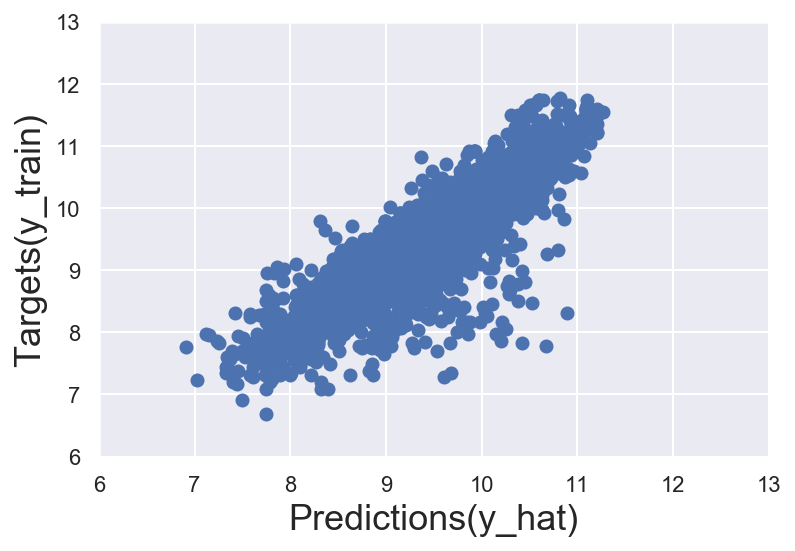

In [36]:
y_hat = reg.predict(x_train)
plt.scatter(y_hat, y_train)
plt.xlabel('Predictions(y_hat)',size = 18)
plt.ylabel('Targets(y_train)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### Additionally, we can also plot the residuals. Which is the difference between the target and predicted values

Text(0.5, 1.0, 'Residuals PDF')

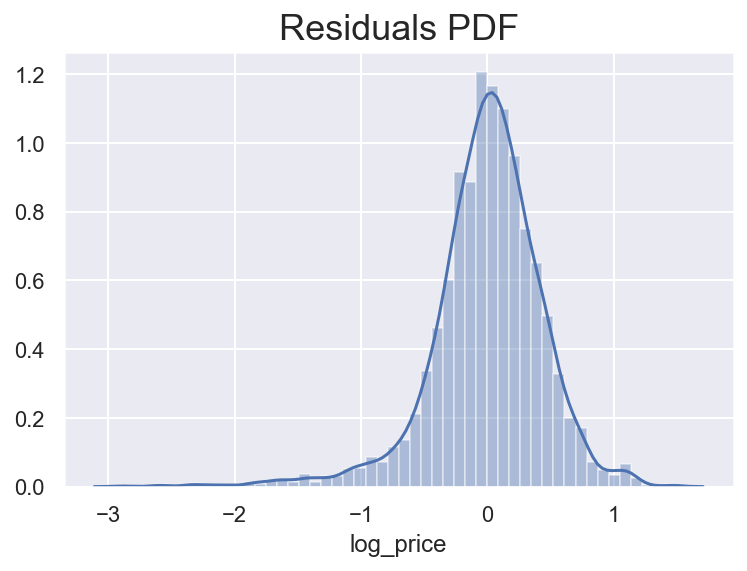

In [37]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)

#### This plot shows a longer left tail which tells us that there are some cases where the residuals are lesser than the mean i.e. the predicted values are higher than the observed. This shows a little overestimation, however, on the right, there is a smaller tail which indicated a less likely possibility of underestimation

### R-squared

In [38]:
reg.score(x_train,y_train)

0.744996578792662

### Weights and bias

In [39]:
reg.intercept_

9.415239458021299

In [40]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

#### Summary Table

In [41]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


#### A positive weight tells us that as the feature increases, the price and log_price increases respectively. A negative weight tells us that as the feature increases, the log_price and price decrease

#### We also notice that a brand is missing from this summary table. This is because one of the dummies was dropped and this dummy was selected as the benchmark. This applies to other dummy variables. 
#### Now let us find the benchmark for the Brand 

In [42]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### The benchmark is Audi. A positive weight for the dummies means that the vehicle brand has a higher log_price and price value than the benchmark. A negative weight means the brand has a lower price and log_price value compared to the benchmark

### Testing

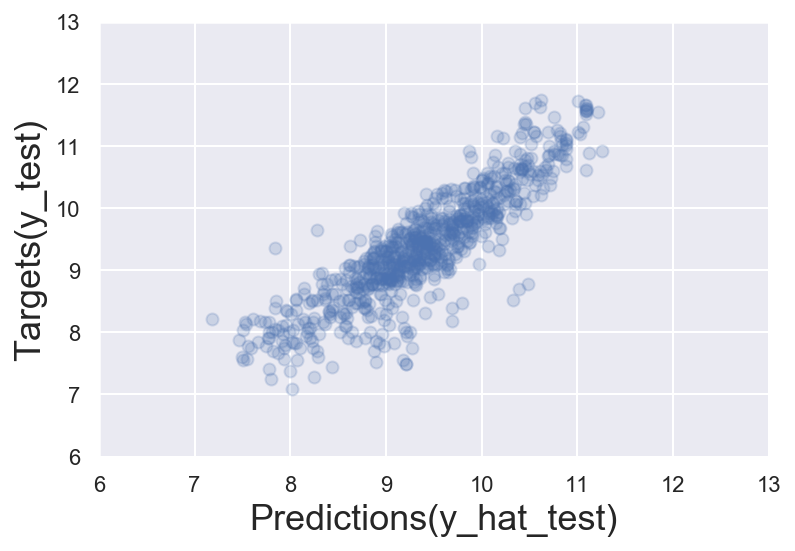

In [43]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_hat_test, y_test, alpha = 0.2) # The alpha parameter allows us to see how concentrated the values are around the 45-degree line
plt.xlabel('Predictions(y_hat_test)',size = 18)
plt.ylabel('Targets(y_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### To evaluate the performace of this model

In [44]:
df_perf = pd.DataFrame(data = np.exp(y_hat_test),columns = ['Predictions'])# We take the exponent(opposite) of log_price 
df_perf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [45]:
df_perf['Targets'] = np.exp(y_test)
df_perf

,Predictions,Targets
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


#### We have a lot of missing values and they're are randomly spread, so we try to reset the index of y_test and drop the missing values

In [46]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

In [47]:
y_test = y_test.reset_index(drop = True)

In [48]:
df_perf['Targets'] = np.exp(y_test)
df_perf

,Predictions,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [49]:
df_perf['Residuals'] = df_perf['Targets'] - df_perf['Predictions']
df_perf['Residuals%'] = abs(df_perf['Targets'] - df_perf['Predictions'])/100
df_perf

,Predictions,Targets,Residuals,Residuals%
0,10685.501696,2300.0,-8385.501696,83.855017
1,3499.255242,2800.0,-699.255242,6.992552
2,7553.285218,2500.0,-5053.285218,50.532852
3,7463.963017,6400.0,-1063.963017,10.639630
4,11353.490075,9150.0,-2203.490075,22.034901
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,1.517264
770,10732.071179,9600.0,-1132.071179,11.320712
771,13922.446953,18300.0,4377.553047,43.775530
772,27487.751303,68500.0,41012.248697,410.122487


In [50]:
df_perf.describe()

,Predictions,Targets,Residuals,Residuals%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,55.639768
std,13133.197604,19967.858908,10871.218143,95.977123
min,1320.562768,1200.000000,-29456.498331,0.153122
25%,7413.644234,6900.000000,-2044.191251,10.727982
50%,11568.168859,11600.000000,142.518577,25.849305
75%,20162.408805,20500.000000,3147.343497,59.371972
max,77403.055224,126000.000000,85106.162329,851.061623


#### We observe that the minimum percentage of residuals is 0.15 which is good. However, the max residual is really high. Our 25th to 75th percentile of residuals are also okay. Let's examine the data closely

In [51]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f'%x)
df_perf.sort_values(by = ['Residuals%'])

,Predictions,Targets,Residuals,Residuals%
369,3084.69,3100.00,15.31,0.15
698,30480.85,30500.00,19.15,0.19
380,3473.79,3500.00,26.21,0.26
60,12469.21,12500.00,30.79,0.31
742,16960.31,16999.00,38.69,0.39
612,2953.17,3000.00,46.83,0.47
272,9749.53,9800.00,50.47,0.50
290,1894.40,1950.00,55.60,0.56
630,8734.58,8800.00,65.42,0.65
549,3816.33,3750.00,-66.33,0.66
